In [1393]:
%%html
<style>
body{
    font-family:"Comic Sans MS",cursive,sans-serif;
}
</style>

Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [1394]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1395]:
data_df = pd.read_csv("bank_marketing_part1_Data.csv")

In [1396]:
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [1397]:
data_df.shape

(210, 7)

In [1398]:
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [1399]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [1400]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [1401]:
data_df.duplicated().sum()

0

In [1402]:
data_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [1403]:
data_df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [1404]:
#Univariate Analysis

Boxplot gives us a good indication of how the values in the data are spread out and also tells us if any outlier is present.

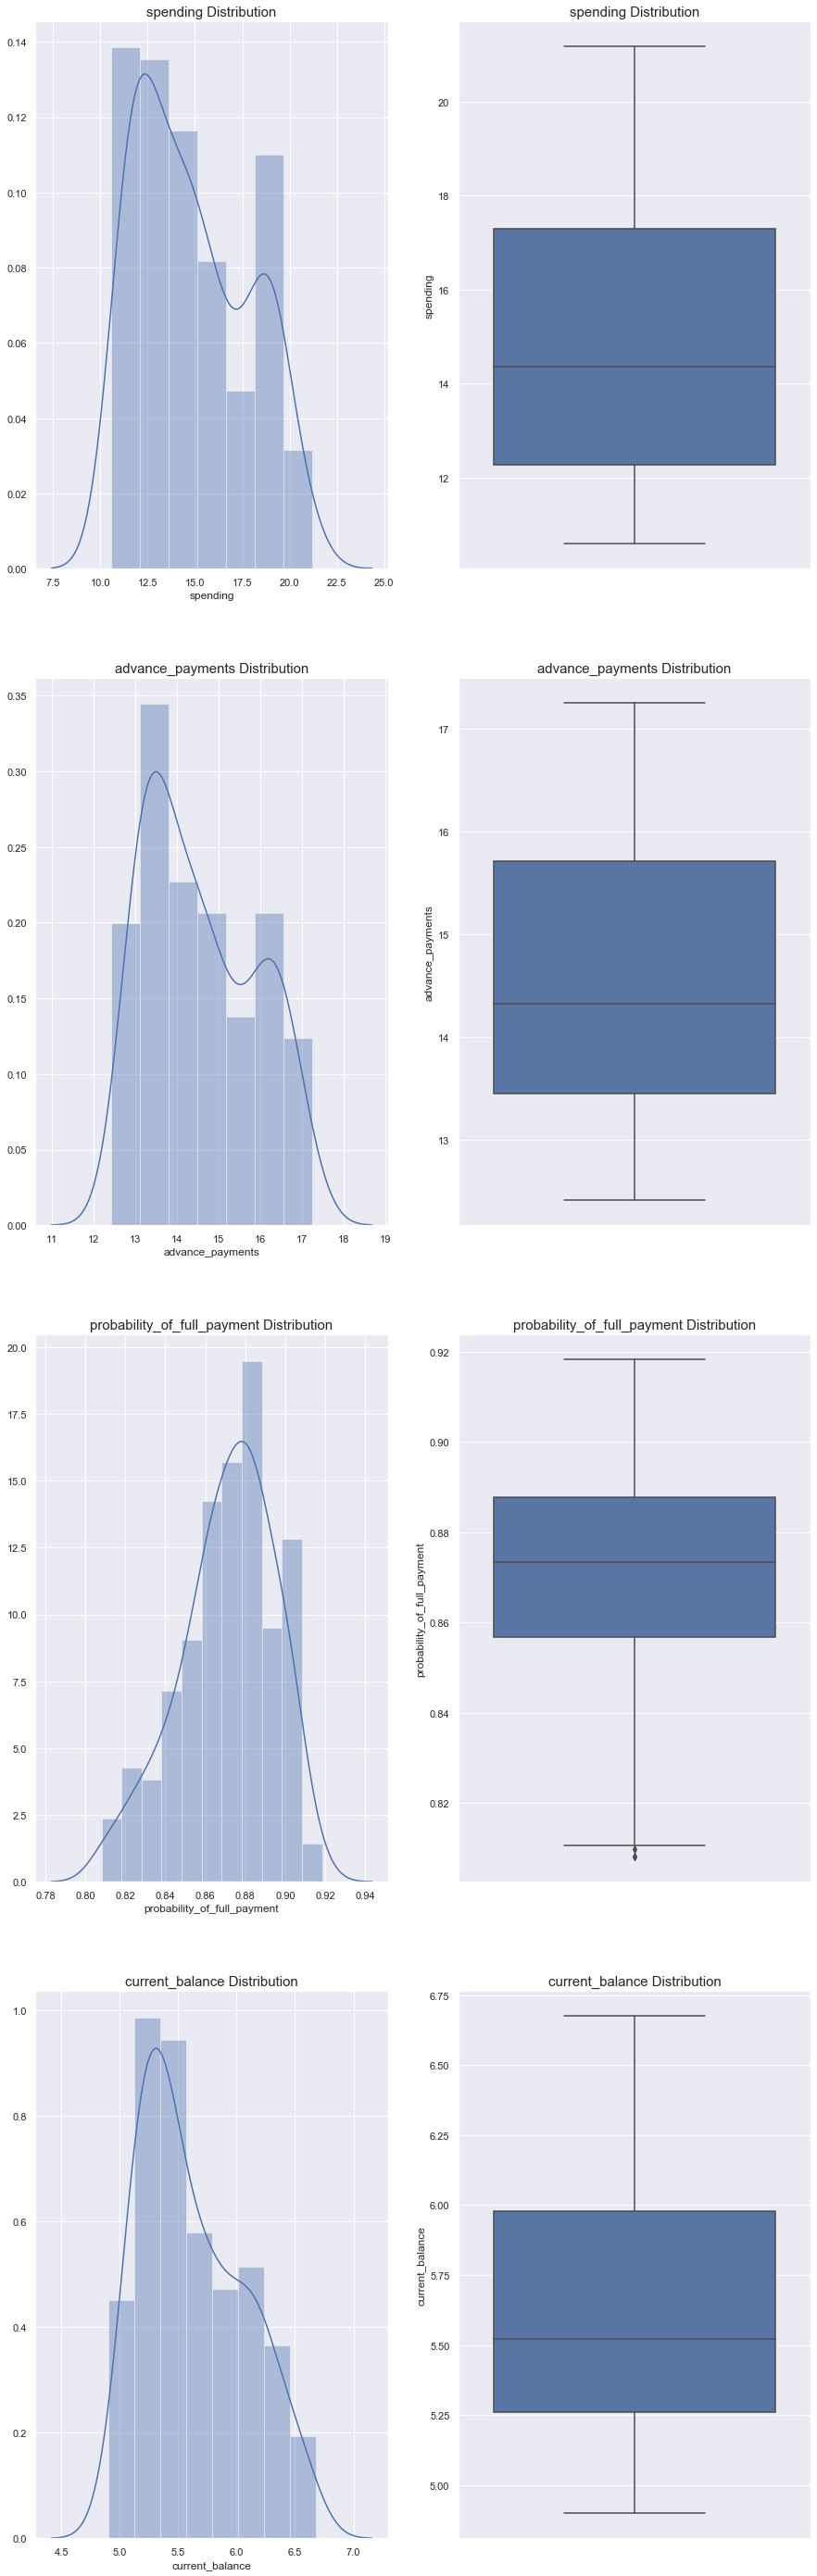

In [1405]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 50)
a = sns.distplot(data_df['spending'] , ax=axes[0][0])
a.set_title("spending Distribution",fontsize=15)
a = sns.boxplot(data_df['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending Distribution",fontsize=15)

a = sns.distplot(data_df['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=15)
a = sns.boxplot(data_df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(data_df['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=15)
a = sns.boxplot(data_df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.distplot(data_df['current_balance'] , ax=axes[3][0])
a.set_title("current_balance Distribution",fontsize=15)
a = sns.boxplot(data_df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance Distribution",fontsize=15)


plt.show()

Text(0.5, 1.0, 'max_spent_in_single_shopping Distribution')

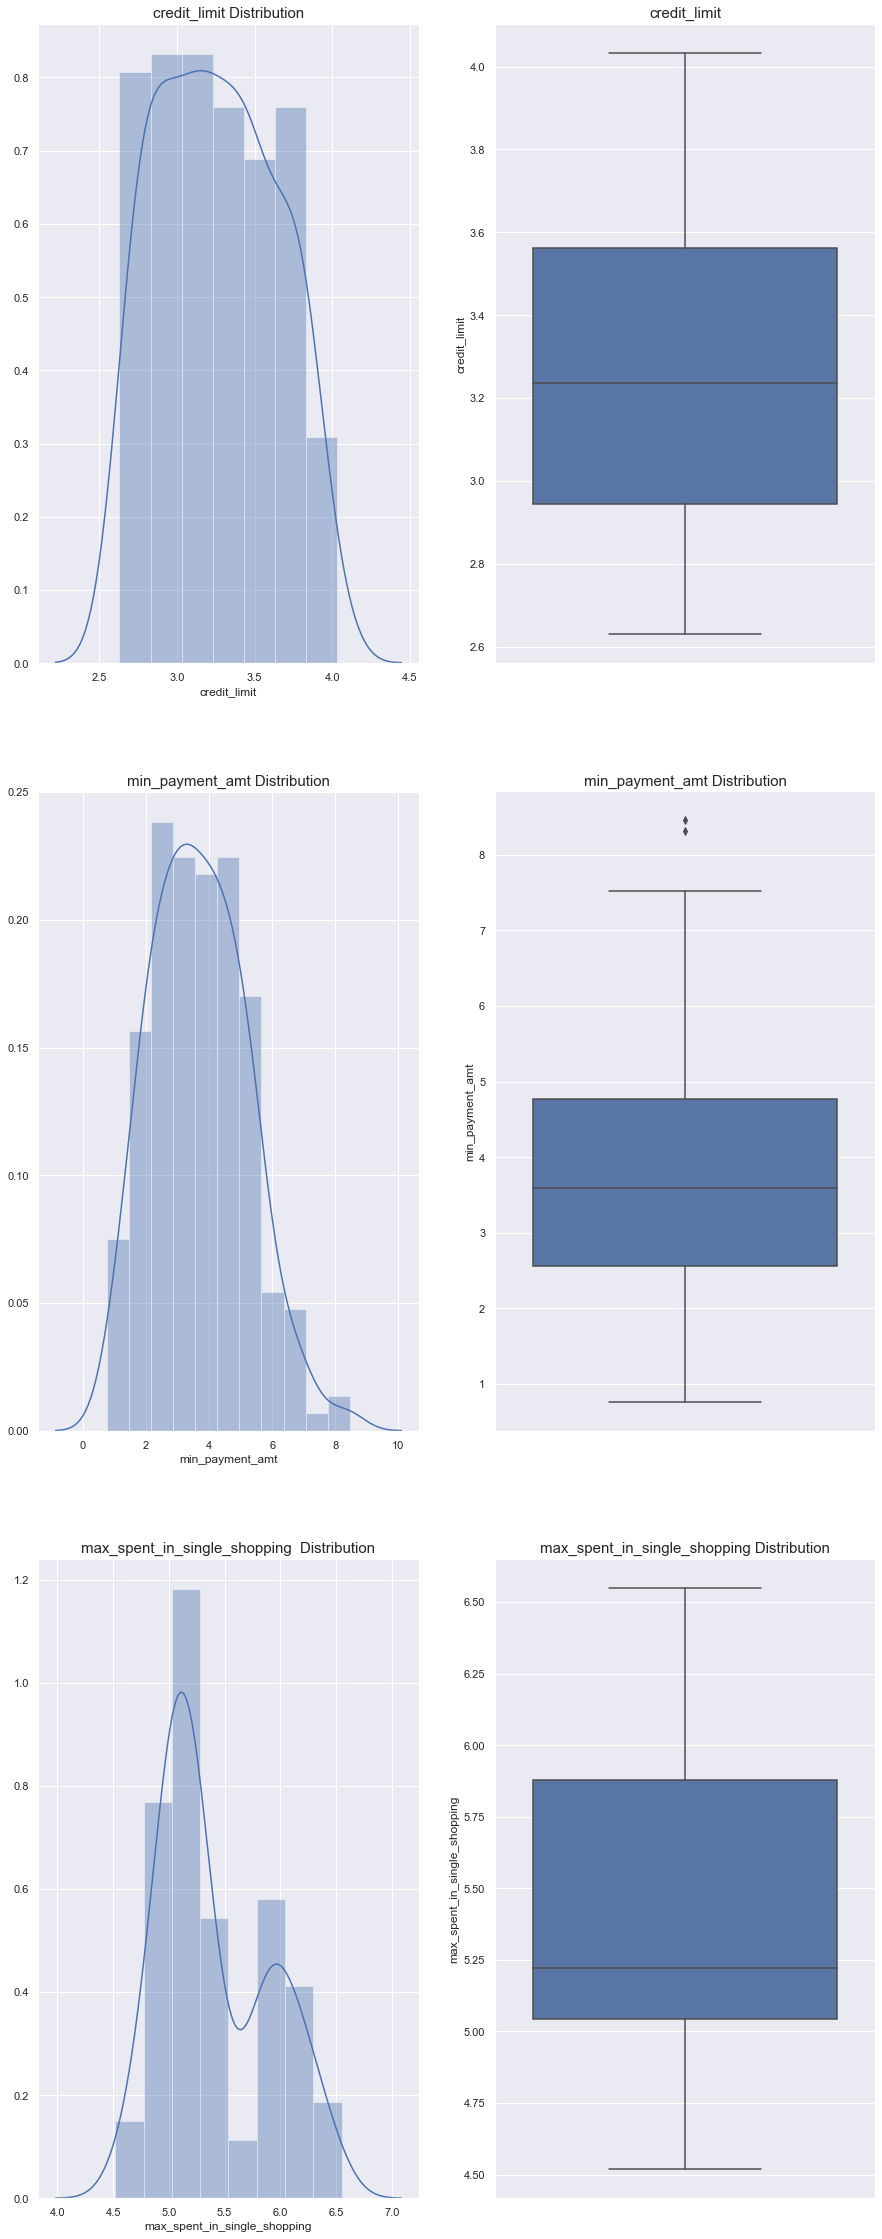

In [1406]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 40)
a = sns.distplot(data_df['credit_limit'] , ax=axes[0][0])
a.set_title("credit_limit Distribution",fontsize=15)
a = sns.boxplot(data_df['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit",fontsize=15)

a = sns.distplot(data_df['min_payment_amt'] , ax=axes[1][0])
a.set_title("min_payment_amt Distribution",fontsize=15)
a = sns.boxplot(data_df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.distplot(data_df['max_spent_in_single_shopping'] , ax=axes[2][0])
a.set_title("max_spent_in_single_shopping  Distribution",fontsize=15)
a = sns.boxplot(data_df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)


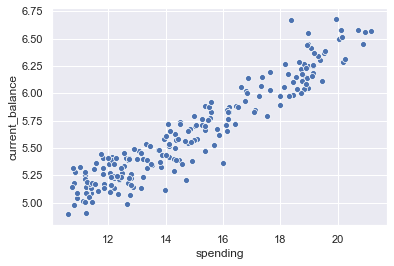

In [1407]:
sns.scatterplot(data_df['spending'],data_df['current_balance'])

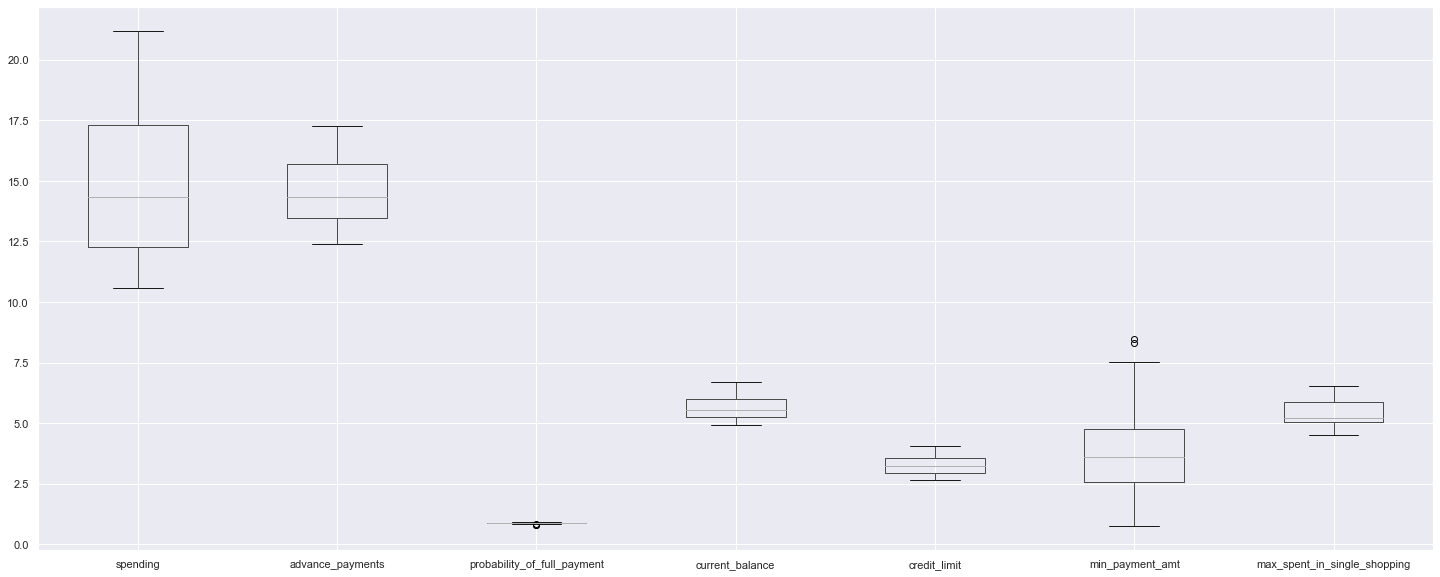

In [1408]:
plt.subplots(figsize=(25,10))
data_df.boxplot(figsize=(20,5))

Univariate analysis refer to the analysis of a single variable.
The purpose of univariate analysis is to summarize and find patterns in the data.
No null value found
No missing value found
Outlier is present only in 1 variable i.e min_payment_amt which means that there are only a few customers whose minimum payment amount falls on the higher side on an average.
and probability_of_full_payment which means there are few customers whose probability to pay full to the bank is on the lower side of average.
Since only these variable have a very small outlier value, hence there is no need to treat the outliers. 
We may conclude that most of the customers have a higher spending capacity,
and most of the customers have a higher probability to make full payment to the bank.

In [1409]:
#MULTIVARIANCE

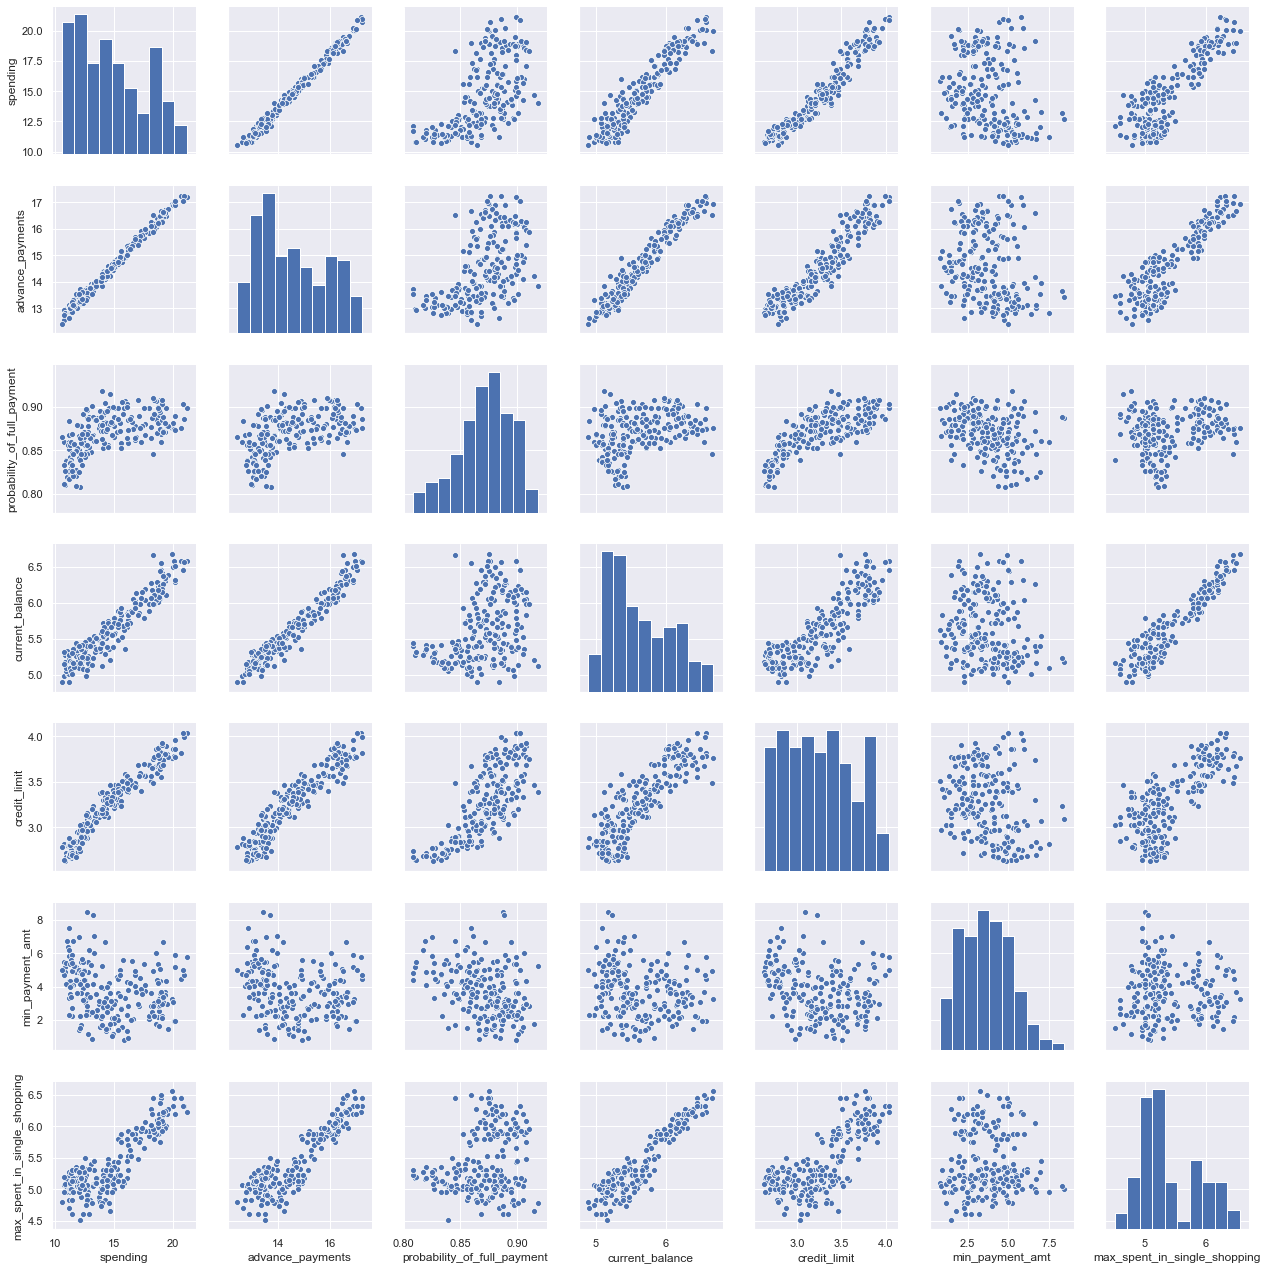

In [1410]:
sns.pairplot(data_df)

In [1411]:
data_df.corr()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


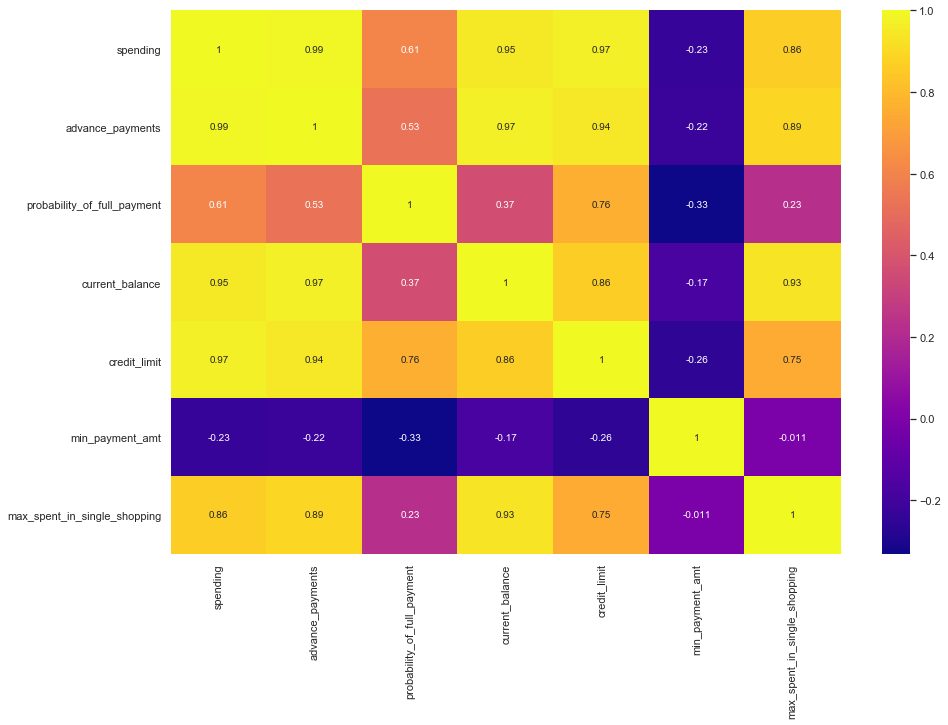

In [1412]:
plt.subplots(figsize=(15,10))
sns.heatmap(data_df.corr(), annot=True,cmap="plasma")

From the above Heatmap we can infer that the:
spending and advance_payments are highly correlated
spending and current_balance are highly correlated
spending and credit_limit are highly correlated
Advance_payment and current_balance are highly correlated
Advance_payment and credit_limit are highly correlated
Advance_payment and max_spent_in_single_shopping are highly correlated
current_balance and max_spent_in_single_shopping are highly correlated

So by this we may infer that the customers who have high credit limit spends more. Also the customers who pays the money in cash also spends more and the customer who have high Balance amount left in the account to make purchases spends more.
min_payment_amt is not correlated with any of the variable so it will not affect by any changes in spending,current_balance or credit limit of the account	
Probability of full payments is higher for those customers who have a higher credit limit. 




# 1.2 Do you think scaling is necessary for clustering in this case? Justify


    spending: Amount spent by the customer per month (in 1000s)
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


Yes, the Data Scaling is necessary in this case.

For this data given to us ,Clearly these variables are measuring very different from each other and all the variables are expressed in different units such as spending in 1000’s, advance payments in 100’s and credit limit in 10000’s and probability_of_full_payment is expressed as fraction and thus have very different scales. If we perform cluster analysis on this data, difference in one variable will most likely dominate the other 2 variables simply because of the scale. All these different variables need to be converted to one scale in order to perform meaningful analysis.



In [1413]:
from sklearn.preprocessing import StandardScaler

In [1414]:
X = StandardScaler()

In [1415]:
scaled_df = X.fit_transform(data_df)

In [1416]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

Clustering,is the extraction of natural groupings of similar data objects.
Hierarchical clustering relies using clustering techniques to find a hierarchy of clusters, where this hierarchy resembles a dendrogram.
Agglomerative clustering uses a bottom-up approach.
For the dataset in question we will be using Agglomerative Hierarchical Clustering method to create optimum clusters and categorising the dataset on the basis of these clusters.

In [1417]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [1418]:
wardlink = linkage(scaled_df,method = 'ward')

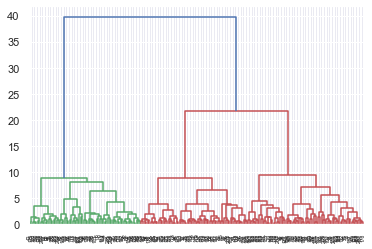

In [1419]:
dend = dendrogram(wardlink)

**Cutting the Dendrogram with suitable clusters**

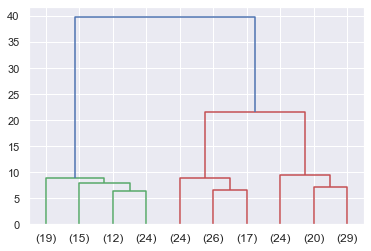

In [1420]:
dend = dendrogram(wardlink,truncate_mode='lastp',p=10,)

We choose truncate mode to select the last p clusters. In green cluster we have 19+51 = 70 products In red we have 24+43+24+49 = 140 products.
From above Dendrogram we may see that optimum number of Clusters may be taken as 2 and maximum number of customer falls in red cluster.

There are two methods to find out the Clustering of the dataset

In [1421]:
from scipy.cluster.hierarchy import fcluster

Method 1 - criterion='maxclust'

In [1422]:
Cluster_1 = fcluster(wardlink, 2, criterion='maxclust')
Cluster_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [1423]:
Cluster_2 = fcluster(wardlink,10, criterion='distance')
Cluster_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

Appending clusters to original dataset for further analysis

In [1424]:
data_df['Cluster_1'] = Cluster_1

In [1425]:
data_df['Cluster_2'] = Cluster_2
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_1,Cluster_2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster.
In K-Means, each cluster is associated with a centroid.

K-means clustering on scaled data

In [1426]:
k_means = KMeans(n_clusters = 2)

In [1427]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [1428]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [1429]:
k_means.inertia_

659.171754487041

In [1430]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [1431]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [1432]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.5811909715524

In [1433]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

327.12572078736446

In [1434]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.24573672030135

In [1435]:
wss =[] 

In [1436]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [1437]:
for i in range(1,11):
    print("wss value for" ,i ,"is", wss[i-1])


wss value for 1 is 1469.9999999999998
wss value for 2 is 659.171754487041
wss value for 3 is 430.6589731513006
wss value for 4 is 371.5811909715524
wss value for 5 is 327.4353937624868
wss value for 6 is 290.8315015114134
wss value for 7 is 263.36052443939946
wss value for 8 is 243.85841000355623
wss value for 9 is 221.67463245178664
wss value for 10 is 206.29380969715774


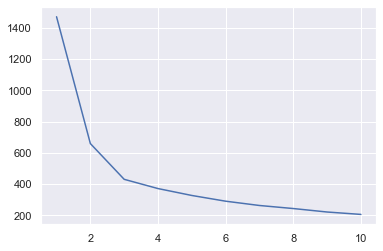

In [1438]:
plt.plot(range(1,11), wss)

As per the above plot in essence of wss method we can conclude that the optimal number of clusters to be taken for k-means clustering is 3 as by looking at the elbow method it can be easily seen in the curve that after 3 the curve gets flat.

In [1439]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [1440]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.4007270552751299

In [1441]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.32757426605518075

In [1442]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.3369008229710853

In [1446]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_1,Cluster_2,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [1454]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.4007270552751299

In [1455]:
sil_width = silhouette_samples(scaled_df,labels)

In [1456]:
data_df["sil_width"] = sil_width
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_1,Cluster_2,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1,0.362276


In [1457]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678533

As per both the methods i.e. wss and silhouette method we can conclude that the optimal number of k or clusters that needs to be taken for k-means clustering is 3. 

The silhouette scores is calculated as 0.400727 and  silhouette widths is calculated using silhouette_samples   The minimum silhouette score is 0.0027. The silhouette score ranges from -1 to +1 and higher the silhouette score better the clustering. 
The silhouette score 0.4007 indicates that the object is well matched to its own cluster.

In [1458]:
data_df.to_csv('projectDM.csv')

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Identify the frequency of occurence of each cluster for Hierarchical Clustering:

In [1459]:
data_df.Cluster_2.value_counts().sort_index()

1    70
2    67
3    73
Name: Cluster_2, dtype: int64

In [1460]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_1,Cluster_2,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1,0.362276


In [1461]:
clust_profile=data_df.drop(['Cluster_1'],axis=1)
clust_profile=clust_profile.groupby('Cluster_2').mean()
clust_profile['freq']=data_df.Cluster_2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width,freq
Cluster_2,,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.542857,0.451629,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,0.059701,0.419314,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,2.068493,0.334857,73


Now the dataset has 70 records in cluster 1, 67 records in cluster2 and 73 records in 
cluster 3.

Observations for Hierarchical Clustering:

For Cluster 1,
Spending is highest, averaging 18371 which is highest among three clusters.
Highest advance payments around 1614 which is highest among three clusters
Probability of Full Payment is very high, averaging around 0.8844 which is highest among three clusters. 
Current Balance is around 6158 which is highest among three clusters. 
Credit Limit is also high 36846 which is highest among three clusters.
min_payment_amt is 363
And also, max_spent_in_single_shopping is around 6017, which is higher comparatively to other clusters. 

For Cluster 2,
The average Spending of this cluster is on lower side, averaging 11872.
advance payments around 1325 which is lowest among the three clusters.
Probability of Full Payment is the least amongst other clusters, averaging around 0.848.
Current Balance is around 5238 which is least among three clusters.
Credit Limit is least for this cluster ranging around 28485.
min_payment_amt is 494 which is max in this cluster.
max_spent_in_single_shopping is around 5122. 

For Cluster 3,
Average Spending of this cluster is 14199.
advance payments around 1423
Probability of Full Payment is on the higher side, averaging around 0.879.
Current Balance is around 5478 which is average among three clusters. 
Credit Limit is around 32264 which is average among three clusters. 
min_payment_amt is 261 which is least among three cluster.
Max_spent_in_single_shopping is the least around 5086. 

Identify the frequency of occurence of each cluster for K_means Clustering:
    

In [1462]:
data_df.Clus_kmeans.value_counts().sort_index()

0    68
1    51
2    61
3    30
Name: Clus_kmeans, dtype: int64

In [1463]:
clust_profile=data_df.drop(['Cluster_1'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=data_df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_2,sil_width,freq
Clus_kmeans,,,,,,,,,,
0,11.852353,13.251029,0.847462,5.237221,2.843853,4.888074,5.118441,2.044118,0.418167,68
1,19.056275,16.433725,0.886394,6.260275,3.760961,3.479392,6.118980,1.000000,0.541755,51
2,14.053279,14.141967,0.881657,5.437820,3.220426,2.423200,5.025852,2.967213,0.361739,61
3,16.096667,15.186667,0.876503,5.829333,3.422333,3.979633,5.633200,1.733333,0.200724,30


Now the dataset has 67 records in cluster 1, 72 records in cluster2 and 71 records in 
cluster 3.

For Cluster 1 (Clus_kmeans =0),
Spending for this cluster is least among all the three clusters, averaging 11856.
advance payments around 1324 which is lowest among the three clusters.
Probability of Full Payment is the least amongst other clusters, averaging around 0.848.
Current Balance is around 5231 which is least among three clusters.
Credit Limit is least for this cluster ranging around 28495.
min_payment_amt is found max in this cluster, around 474.
Max_spent_in_single_shopping is around 5101. 

For Cluster 2(Clus_kmeans =1),
Spending is highest amongst other clusters, averaging 18495.
Highest advance payments around 1620 which is highest among three clusters
Probability of Full Payment is on the higher side, averaging around 0.884.
Current Balance is around 6175 which is highest among three clusters.
Credit Limit is ranging in between for this cluster is around 36975 which is highest amongst three clusters.
min_payment_amt is found least in this cluster, it is around 363.
max_spent_in_single_shopping is the highest around 6041. 

For Cluster 3(Clus_kmeans =2),
Average Spending of this cluster is 14437.
advance payments around 1433.
Probability of Full Payment is least among other Clusters, averaging around 0.8815.
Current Balance is around 5514,which is average as compared to other two clusters.
Credit Limit for this cluster ranging around 32592.
min_payment_amt is averaging 270,which is the least amongst others. 
max_spent_in_single_shopping is around 5120. 


Promotional strategy :

For Hierarical Clusters

For K-means Clusters


Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.
2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model
2.4 Final Model: Compare all the model and write an inference which model is best/optimized.
2.5 Inference: Basis on these predictions, what are the business insights and recommendations



# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [1464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [1465]:
ins_df = pd.read_csv("insurance_part2_data.csv")

In [1466]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [1467]:
ins_df.shape

(3000, 10)

In [1468]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [1469]:
ins_df['Claimed'].nunique()

2

Checking the object variables to see if they are useful for the model building or 
we can drop the columns if the values are like serial numbers/ customer id etc.

In [1470]:
ins_df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [1471]:
ins_df.Age.value_counts()

36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64

In [1472]:
ins_df.Type.value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [1473]:
ins_df.Channel.value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [1474]:
ins_df.Destination.value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [1475]:
ins_df.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

From the above, it is observed that all the above variables are required to build the model.

As our Target Variable is Claimed, we can Plot the countplot for "Claimed"

In [1476]:
ins_df.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

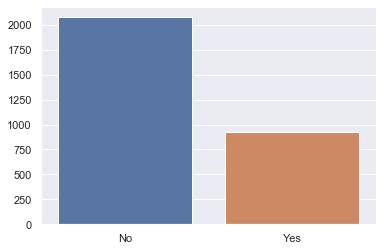

In [1477]:
sns.barplot(ins_df.Claimed.value_counts().index,ins_df.Claimed.value_counts().values)
plt.show()


From the above value count for Claimed status No- 69.2% and Claimed status Yes- 30.8% .
It shows there are a large number of people who have claimed for insurance.
The data is well balanced and is fit for model building

In [1478]:
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


As there are only 4 continuous variables Age,Commision,Duration and Sales, the result is shown for them only. 
Now lets take variable Duration - we can say that there are outliers as the difference between 75% (63)
and max value(4580) is very high and similar case is with other variables also. Hence outlier detection and treatment is 
necessary for analysis on the dataset.

In [1479]:
ins_df.isnull().sum()


Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Check for duplicate data

In [1480]:
dups = ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
ins_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Removing Duplicates

In [1481]:
ins_df.drop_duplicates(inplace=True) 

In [1482]:
dups = ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(ins_df.shape)

Number of duplicate rows = 0
(2861, 10)


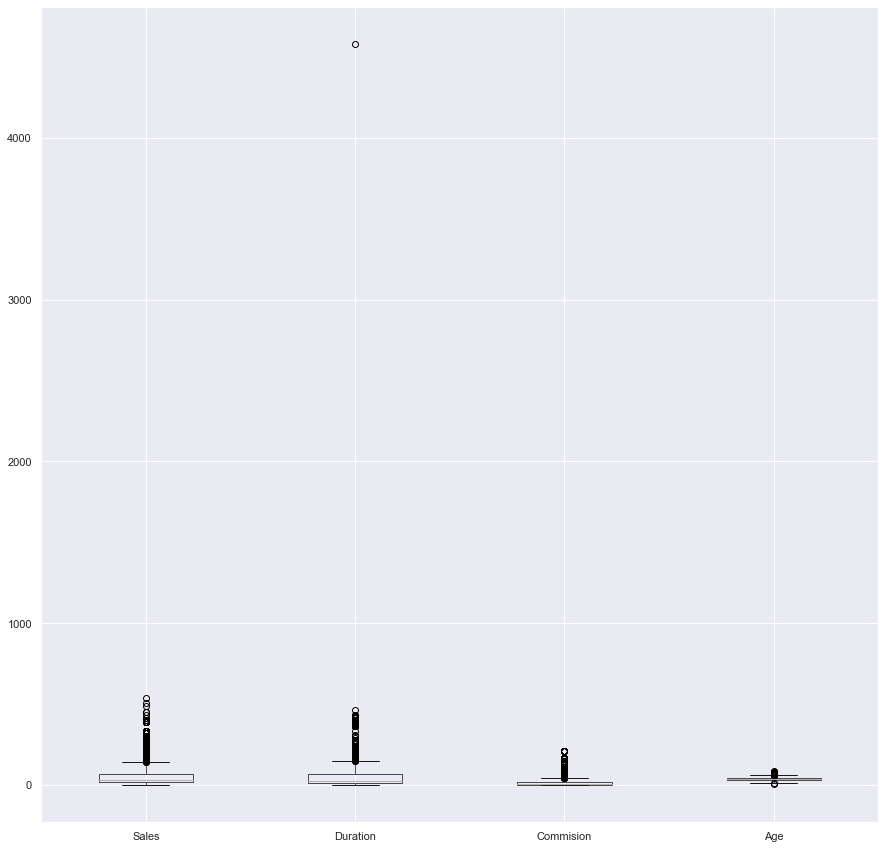

In [1483]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
ins_df[['Sales', 'Duration', 'Commision', 'Age']].boxplot()

There are outliers in all the variables.

Treating the Outliers

In [1484]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1485]:
for feature in ins_df[['Sales', 'Duration', 'Commision', 'Age']]: 
    lr,ur=treat_outlier(ins_df[feature])
    ins_df[feature]=np.where(ins_df[feature]>ur,ur,ins_df[feature])
    ins_df[feature]=np.where(ins_df[feature]<lr,lr,ins_df[feature])

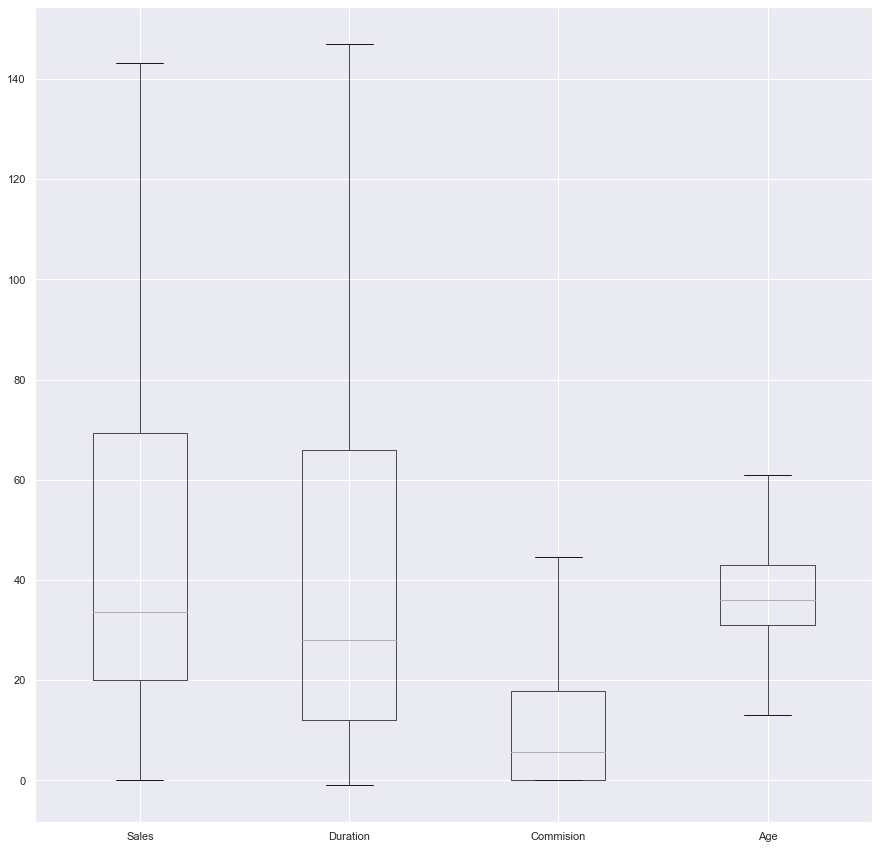

In [1486]:
plt.figure(figsize=(15,15))
ins_df[['Sales', 'Duration', 'Commision', 'Age']].boxplot()

# Checking pairwise distribution of the continuous variables

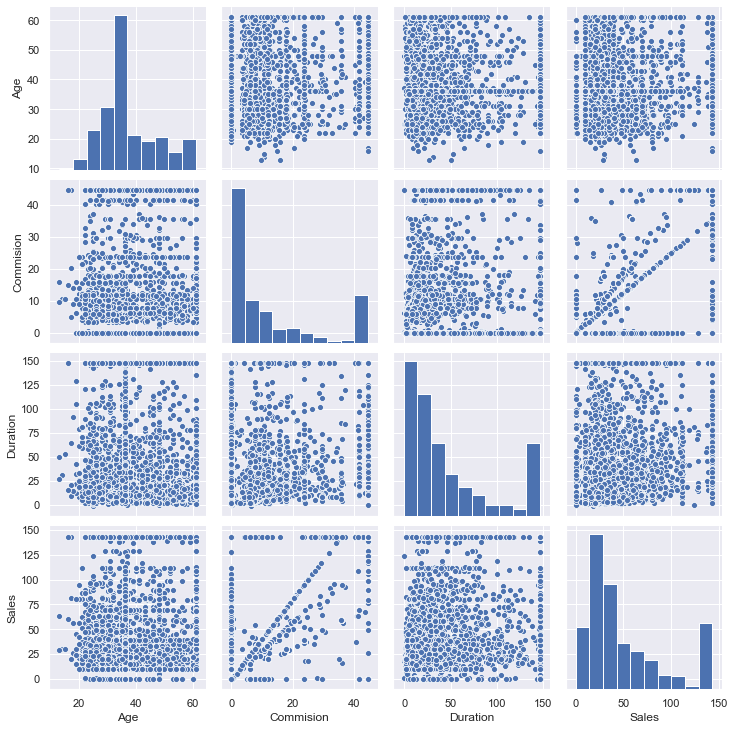

In [1487]:
sns.pairplot(ins_df);

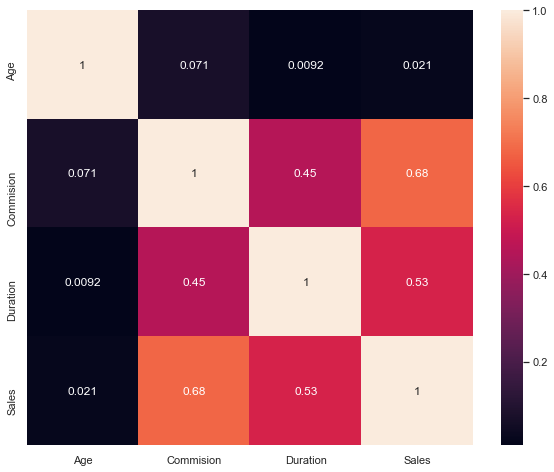

In [1488]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.0)
sns.heatmap(ins_df.corr(), annot=True)

Inference: 
By checking the Boxplots for all the continous variables we can conclude that a very high number of outliers are present in all the continous variables namely, Age, Commision, Duration and Sales which means that we need to treat these outlier values so as to proceed further with our model building and analysis as these values can create errors and can deviate from the actual results.
We can conclude from the  that the majority of the customers doing a claim in our data belong to age group of 30-50 years and it is observed that age group between 30-36 contribute to the maximum number of claims and with the type of Tour Agency being Travel Agency, Channel being Online, Product name being Customised Plan and Destination being Asia.

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network 

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

Decision tree can take only numerical columns. It cannot take 
object .So we will converts all the columns with data type as object into categorical codes.

Converting all objects to categorical codes

In [1116]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [1117]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 208.5 KB


In [1118]:
df=ins_df
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


Proportion of 1s and 0s

In [1122]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

Extracting the target column into separate vectors for training set and test set

In [1123]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


Our data set is ready for training and testing.
The first step for the same is to separate the target variable.

In [1124]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Test size we have given as 0.30 as we want 30% of the data is to be tested. Random 
state we have given as 1,as it will give similar results when we run the same on different 
computers with the same random state.

In [1125]:
##Checking the dimensions of the training and test data

In [1126]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# Building a Decision Tree Classifier

In [1127]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [1128]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

Generating Tree

In [1129]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

In [1130]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


In [1131]:
## Predicting on Training and Test dataset

In [1132]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [1133]:
## Getting the Predicted Classes and Probs

In [1134]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


# Model Evaluation for Decision tree

In [1135]:
### AUC and ROC for the training data

AUC: 0.810


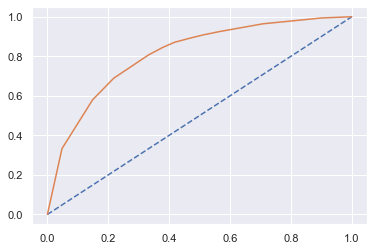

In [1136]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [1137]:
### Confusion Matrix for the training data

In [1138]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [1139]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [1140]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [1141]:
### AUC and ROC for the test data

AUC: 0.792


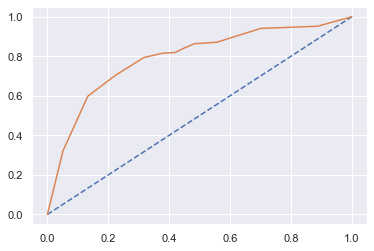

In [1142]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [1143]:
### Confusion Matrix for the test data

In [1144]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [1145]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [1146]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [1147]:
# Cart Conclusion


Train Data: AUC: 81.0% Accuracy: 76.4% Precision: 65% f1-Score: 61%

Test Data: AUC: 79.2% Accuracy: 78.2% Precision: 68% f1-Score: 63%

Training and Test set results are almost similar, and with the overall measures good, the model is a good model.

Agency_Code is the most important variable for predicting Claim status.


# Building a Random Forest Classifier

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid.

In [1150]:
param_grid = {
    'max_depth': [10],
    'max_features': [6],
    'min_samples_leaf': [10],
    'min_samples_split': [50], 
    'n_estimators': [300] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [1151]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [1152]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [1153]:
best_grid = grid_search.best_estimator_

In [1154]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

# Predicting the Training and Testing data

In [1155]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# RF Model Performance Evaluation on Training data

In [1156]:
confusion_matrix(train_labels,ytrain_predict)

array([[1222,  137],
       [ 255,  388]], dtype=int64)

In [1157]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8041958041958042

In [1158]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



In [1160]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
ins_df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ins_df.loc["1"][0],2)
rf_train_recall=round(ins_df.loc["1"][1],2)
rf_train_f1=round(ins_df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.6
rf_train_f1  0.66


Area under Curve is 0.8621487760303123


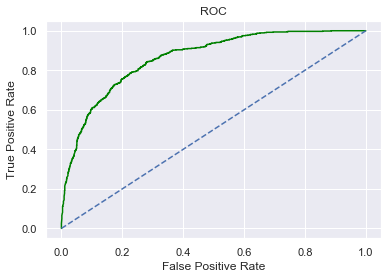

In [1162]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# RF Model Performance Evaluation on Test data

In [1163]:
confusion_matrix(test_labels,ytest_predict)

array([[521,  67],
       [114, 157]], dtype=int64)

In [1164]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.789289871944121

In [1165]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.58      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [1166]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
ins_df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ins_df.loc["1"][0],2)
rf_test_recall=round(ins_df.loc["1"][1],2)
rf_test_f1=round(ins_df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.58
rf_test_f1  0.63


Area under Curve is 0.813402113612973


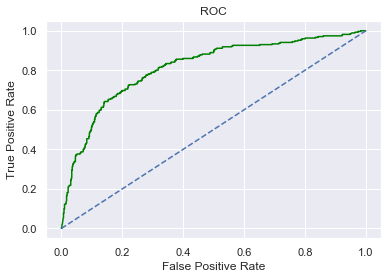

In [1167]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [1168]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.329660
Sales         0.203813
Product Name  0.176773
Duration      0.095796
Commision     0.088820
Age           0.074503
Type          0.016091
Destination   0.012847
Channel       0.001698


Random Forest Conclusion

Train Data:
AUC: 86.2%
Accuracy: 80.4%
Precision: 0.74%
f1-Score: 0.66%

Test Data:
AUC: 78.9%
Accuracy: 81.3%
Precision: 0.7%
f1-Score: 0.63%

Training and Test set results are good, and with the overall measures high, the model is a good model.
Agency code is again the most important variable for predicting claim status.


# Building a Neural Network Classifier

In [1205]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [1206]:
param_grid = {
 'hidden_layer_sizes': [100],
 'activation': ['relu'],
 'solver': ['adam', 'sgd' ], 
 'tol': [0.01,0.1],
 'max_iter' : [10000]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv =3)

In [1207]:
grid_search.fit(X_trains, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [1208]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=10000, random_state=1, tol=0.1)

# Predicting the Training and Testing data

In [1209]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# NN Model Performance Evaluation on Training data

In [1210]:
confusion_matrix(train_labels,ytrain_predict)

array([[1057,  302],
       [ 280,  363]], dtype=int64)

In [1186]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7092907092907093

In [1187]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1359
           1       0.55      0.56      0.56       643

    accuracy                           0.71      2002
   macro avg       0.67      0.67      0.67      2002
weighted avg       0.71      0.71      0.71      2002



In [1188]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
ins_df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(ins_df.loc["1"][0],2)
nn_train_recall=round(ins_df.loc["1"][1],2)
nn_train_f1=round(ins_df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.55
nn_train_recall  0.56
nn_train_f1  0.56


Area under Curve is 0.7294066284673228


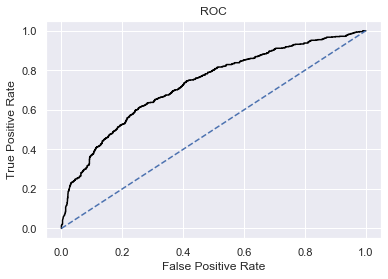

In [1189]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [1190]:
## NN Model Performance Evaluation on Test data

In [1191]:
confusion_matrix(test_labels,ytest_predict)

array([[458, 130],
       [123, 148]], dtype=int64)

In [1192]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7054714784633295

In [1193]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       588
           1       0.53      0.55      0.54       271

    accuracy                           0.71       859
   macro avg       0.66      0.66      0.66       859
weighted avg       0.71      0.71      0.71       859



In [1202]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
ins_df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(ins_df.loc["1"][0],2)
nn_test_recall=round(ins_df.loc["1"][1],2)
nn_test_f1=round(ins_df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.53
nn_test_recall  0.55
nn_test_f1  0.54


Area under Curve is 0.7155345533047168


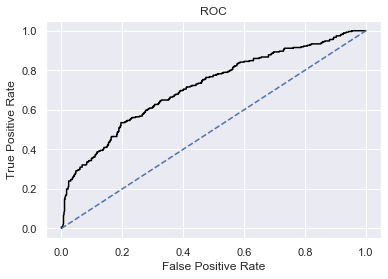

In [1195]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [1196]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=10000, random_state=1, tol=0.1)>

Neural Network Conclusion

Train Data:
AUC: 78.7%
Accuracy: 75.8%
Precision: 64%
f1-Score: 59%

Test Data:
AUC: 78.6%
Accuracy: 75.4%
Precision: 63%
f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.


# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

# Final Conclusion
Comparison of the performance metrics from the 3 models


In [1197]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.80,0.79,0.71,0.71
AUC,0.81,0.79,0.86,0.81,0.73,0.72
Recall,0.58,0.60,0.60,0.58,0.56,0.55
Precision,0.65,0.68,0.74,0.70,0.55,0.53
F1 Score,0.61,0.63,0.66,0.63,0.56,0.54


ROC Curve for the 3 models on the Training data

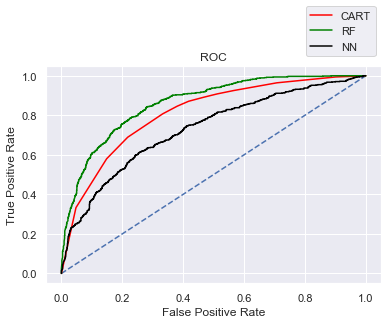

In [1198]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

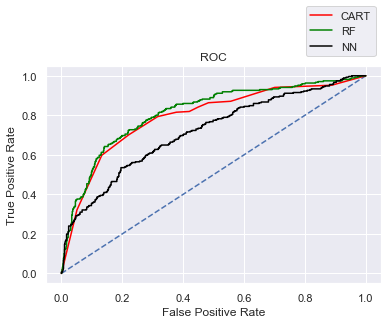

In [1199]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model,From Cart and Random Forest Model, Instead of creating a single Decision Tree it can create a multiple decision trees as Random Forest have much less variance than a single decision tree and hence can provide the best claim status from the data.

The Agency_Code is found to be the most useful feature amongst all other features for predicting if a person will claim for insurance or not. 


# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

The Agency code has significant importance
Data contains significant number of outliers.
Out of the 3 models, Random Forest has slightly better performance than the Cart and 
Neural network models.
Instead of creating a single Decision Tree it can create a multiple decision trees as Random Forest have much less variance than a single decision tree and hence can provide the best claim status from the data.
Overall all the three models are reasonably stable enough to be used for making any 
future predictions as there is no overfitting.
By performing the 3 models, we can conclude that the data set is well balanced to conduct the modelling. 

Claims are higher for Destination- ASIA.May be people are negligentto follow the terms and conditions or the terms and conditions present in the policy are less for them so the company can revise the Terms and Conditions for ASIA. Company should take necessary procedures before alloting policy in ASIA. Company can also increase the premium on the policy to recover the claim cost .

Claims are Higher for Online Distribution channel and very low for offline channel. Reason may be the online procedure is easy and saves time. So the insurance company should promote the offline purchase by providing some offers ,less premium cost or any other additional offer.

Management can make the policy purchase procedure very simple and increase the complexity of the Claim Procedure. 
Reductions in claims payments minimizes the need to raise insurance premiums. This makes insurance more efficient and affordable.